In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

**Finding Gaussian Kernel Value**


```
g(x) = 1/sqrt(2.pi.sigma).e^(-(x^2+y^2))
```

In [32]:
# sigma = 1

for i in range(-3, 4):
  # print(i, end='    ')
  for j in range(-3, 4):
    g = math.exp(-((i * i) + (j * j)) / 2)
    g = g/math.sqrt(2 * math.pi)
    g = g / 0.399   # to make center value 1
    g = g * 4       # to make center value more weighted and other value greater than one 
    print("{0:.3f}".format(round(g)), end=',   ')
  print()




0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   
0.000,   0.000,   0.000,   1.000,   0.000,   0.000,   0.000,   
0.000,   0.000,   1.000,   2.000,   1.000,   0.000,   0.000,   
0.000,   1.000,   2.000,   4.000,   2.000,   1.000,   0.000,   
0.000,   0.000,   1.000,   2.000,   1.000,   0.000,   0.000,   
0.000,   0.000,   0.000,   1.000,   0.000,   0.000,   0.000,   
0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   


**Finding second derivative Gaussian Kernel Value**


```
g(x) = 1/(sqrt(2.pi).sigma^3).(((x^2+y^2)/sigma^2) - 2).e^(-(x^2+y^2))
```

In [132]:
# sigma = 1

for i in range(-3, 4):
  # print(i, end='    ')
  for j in range(-3, 4):
    gg = math.exp(-((i * i) + (j * j)) / 2)
    gg = gg * (((i * i) + (j * j)) - 2)
    gg = gg/math.sqrt(2*math.pi)
    gg = gg / 0.798         # to make center value 1
    gg = gg * (-4)             # to make center value more weighted and other value greater than one 
    print("{0:.3f}".format(round(gg)), end=',   ')
  print()

'''
now we can easily find out the second derivative two dimensional gaussian kernel
from center point of size 3x3 kernel size be like,
0 1 0
1 4 1
0 1 0

'''

0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   
0.000,   0.000,   0.000,   -1.000,   0.000,   0.000,   0.000,   
0.000,   0.000,   0.000,   1.000,   0.000,   0.000,   0.000,   
0.000,   -1.000,   1.000,   4.000,   1.000,   -1.000,   0.000,   
0.000,   0.000,   0.000,   1.000,   0.000,   0.000,   0.000,   
0.000,   0.000,   0.000,   -1.000,   0.000,   0.000,   0.000,   
0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   


'\nnow we can easily find out the second derivative two dimensional gaussian kernel\nfrom center point of size 3x3 kernel size be like,\n0 1 0\n1 4 1\n0 1 0\n\n'

**Convert RGB value to GrayScale Value**

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


**Zero Crossing Function for Laplacian of Gaussian Edge Detection**

In [0]:
def zero_crossing(image):
    z_c_image = np.zeros(image.shape)
    
    # For each pixel, count the number of positive
    # and negative pixels in the neighborhood
    threshold = np.absolute(image).mean() * 0.75
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1],image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1
 
 
            # If both negative and positive values exist in 
            # the pixel neighborhood, then that pixel is a 
            # potential zero crossing
            
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            # Change the pixel value with the maximum neighborhood
            # difference with the pixel
 
            if z_c:
                if image[i,j]>0 and d - e >= threshold:
                    z_c_image[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    z_c_image[i, j] = np.abs(image[i,j]) + d
                
    # Normalize and change datatype to 'uint8' (optional)
    z_c_norm = z_c_image/z_c_image.max()*255
    z_c_image = np.uint8(z_c_norm)
 
    return z_c_image

**Laplacian of Gaussian Edge Detection**

**Image is first smoothed with a Gaussian filter and then we find the zero crossings using Laplacian. This two-step process is called the Laplacian of Gaussian (LoG) operation.**

**Instead of first smoothing an image with a Gaussian kernel and then taking its Laplace, we can obtain the Laplacian of the Gaussian kernel and then convolve it with the image.**

***::Steps::***


1.   Apply LoG on the image.
2.   Find the zero crossings in the image
3.   Threshold the zero crossings to extract only the strong edges.



`Δ^2(f*g) = f * Δ^2(g)`



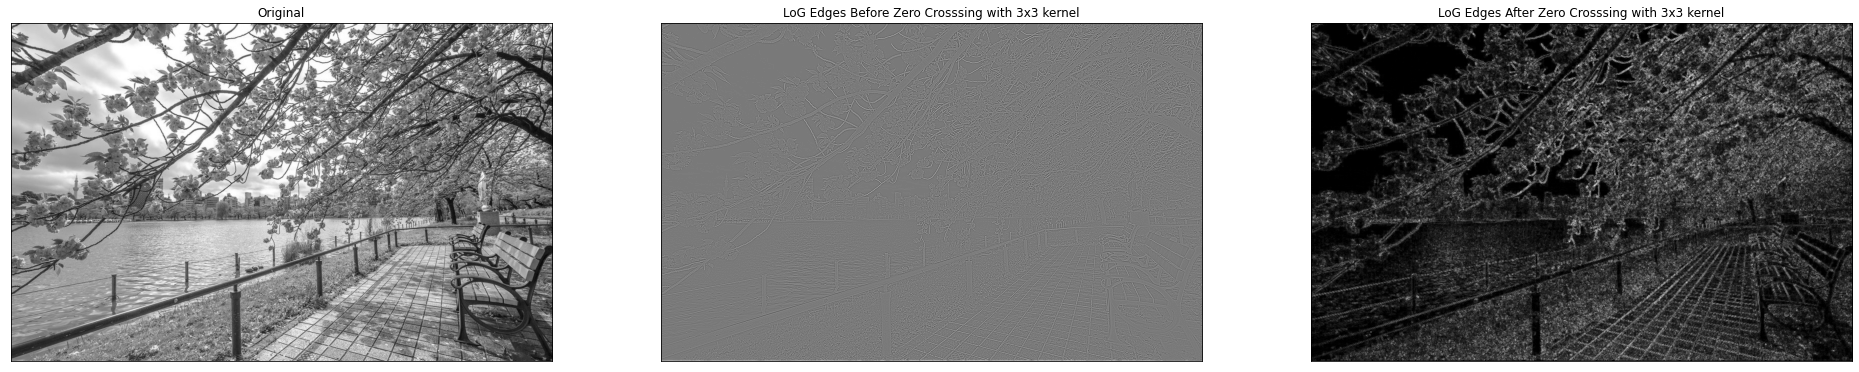

In [135]:
# img = plt.imread('place.jpg')
rgb_img = plt.imread('place.jpg')
img = rgb2gray(rgb_img)

log_kernel = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
n, m = img.shape
# print(n, m, d)

new_img = img.copy()

for i in range(1, n - 2):
  for j in range(1, m - 2):
    pixel_matrix = img[i - 1 : i + 2, j - 1 : j + 2]
    convolve = pixel_matrix * log_kernel
    val = convolve.sum()
    new_img[i][j] = val

zero_crossing_img = zero_crossing(new_img)
# zero_crossing = new_img/new_img.max()

plt.figure(figsize=(33,27))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(new_img, cmap='gray')
plt.title("LoG Edges Before Zero Crosssing with 3x3 kernel")
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(zero_crossing_img, cmap='gray')
plt.title("LoG Edges After Zero Crosssing with 3x3 kernel")
plt.xticks([])
plt.yticks([])
plt.show()

**LoG using Library Function**

**Before Zero Crossing**

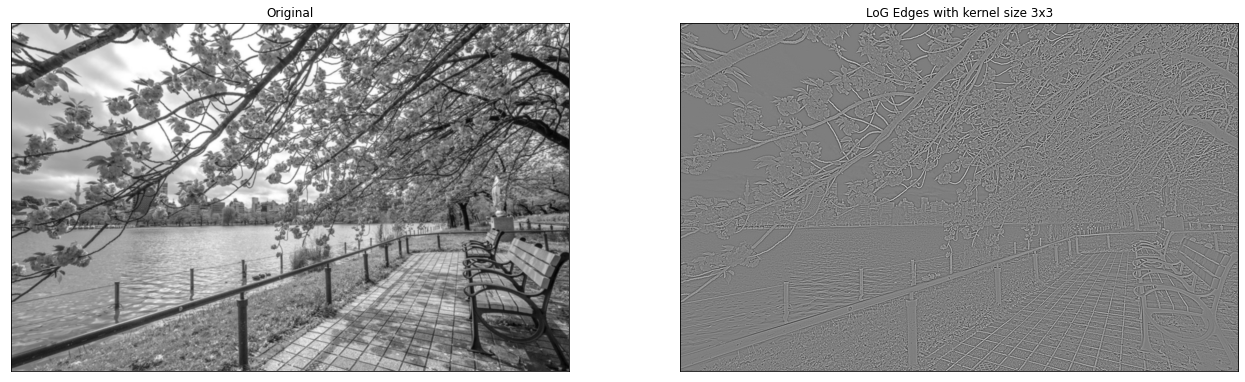

In [46]:
# Load the image in greyscale
img = cv2.imread('place.jpg',0)
 
# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)
 
# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F)

# But this tends to localize the edge towards the brighter side.
laplacian1 = laplacian/laplacian.max()

plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(blur, cmap='gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(laplacian1, cmap='gray')
plt.title("LoG Edges with kernel size 3x3")
plt.xticks([])
plt.yticks([])
plt.show()

**Applying Zero Crossing**

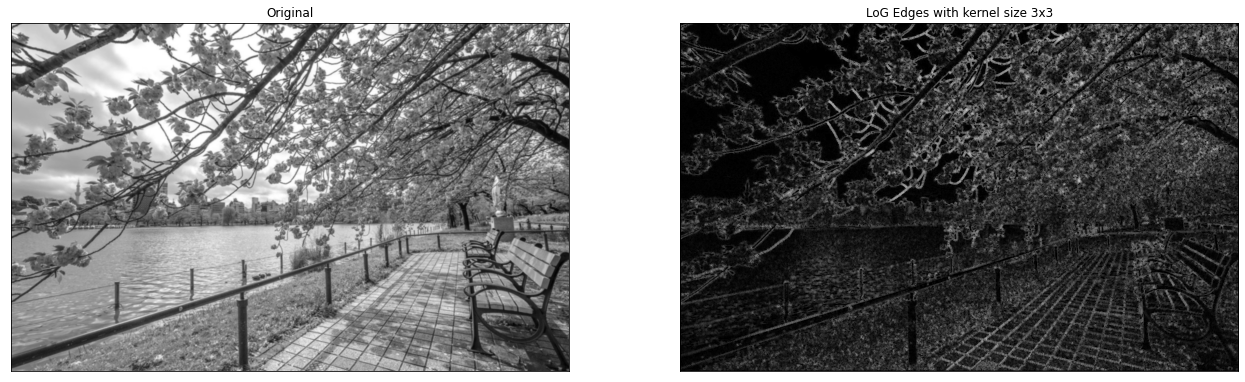

In [137]:
# Load the image in greyscale
img = cv2.imread('place.jpg',0)
 
# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)
 
# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
zero_crossing = Zero_crossing(laplacian)
# But this tends to localize the edge towards the brighter side.
laplacian1 = zero_crossing/zero_crossing.max()

plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(blur, cmap='gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(laplacian1, cmap='gray')
plt.title("LoG Edges with kernel size 3x3")
plt.xticks([])
plt.yticks([])
plt.show()